In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps, ImageEnhance

from src.V1_Compress import generate_Y, compress
import pandas as pd
import seaborn as sns
import time
import os.path

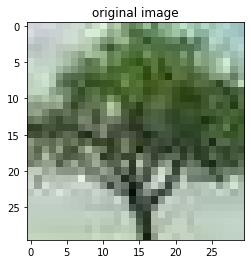

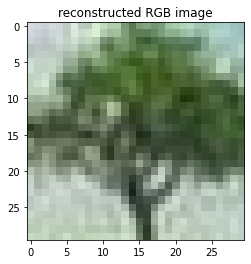

In [24]:
image_path = 'image/tree_part1.jpg'
num_cell = 500
cell_size = 7
sparse_freq = 2
alpha = 0.01

filter_dim = (30, 30)
filt = np.zeros(filter_dim)

img = Image.open(image_path)
img_arr = np.asarray(img)
# dim = img_arr.shape

i = 0
dim = img_arr[:,:,i].shape

W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
final = np.zeros(img_arr.shape)

# with same V1 cells generated, reconstruct images for each of 3 rgb arrays and append to final
while (i < 3):
    img_arr_pt = img_arr[:,:,i]
    img_arr_pt_dim = img_arr_pt.shape
    n_pt, m_pt = img_arr_pt_dim
    y = generate_Y(W, img_arr_pt)
    W_model = W.reshape(num_cell, n_pt, m_pt)
    theta, reform, s = compress(W_model, y, alpha)
    final[:,:,i] = reform
    i+=1
    
final = np.round(final).astype(int)

plt.imshow(img_arr)
plt.title("original image")
plt.show()

# org_factor = 2
# org_enhancer = ImageEnhance.Sharpness(img)
# org_sharp = org_enhancer.enhance(org_factor)
# plt.imshow(org_sharp)
# plt.title("Original image sharpened by factor of {f}".format(f = org_factor))
# plt.show()

plt.imshow(np.round(final).astype(int))
plt.title("reconstructed RGB image")
plt.show()

# Print error


# final = Image.fromarray(final.astype(np.uint8))
# enhancer = ImageEnhance.Sharpness(final)
# factor = 2
# final_sharp = enhancer.enhance(factor)
# plt.imshow(final_sharp)
# plt.title("sharpened reconstructed image by factor of {f}".format(f = factor))
# plt.show()

In [22]:
np.min(img_arr - final)

-55